## 퍼셉트론 
가장 간단한 인공 신경망 구조 중 하나로 1957년 프랑크 로젠블라트가 제안했다. 퍼셉트로는 TLU 또난 LTU라고 불리는 조금 다른 형태의 인공 뉴런을 기반으로 한다. 입력과 출력이 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관되어 있다.  

TLU는 입력의 가중치 합을 계산 한뒤 계산된 합에 step func를 적용하여 결과를 출력   
퍼셉트론에서 가장 널리 사용되는 계단 함수는 헤비사이드 계단 함수이다. 

퍼셉트론은 층이 하나 뿐인 TLU로 구성된다. 각 TLU는 모든 입력에 연결되어 있다. 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때 이를 FC 또는 dense layer라고 부른다. 퍼셉트론의 입력은 입력 뉴런이라 불린다. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

i = load_iris()
X = i.data[: ,(2,3)]
y = (i.target  ==0).astype(np.int)

per_clf = Perceptron(max_iter = 1000, tol = 1e-3, random_state= 42)
per_clf.fit(X, y)

y_pred=  per_clf.predict([[2,0.5]])
y_pred

array([1])

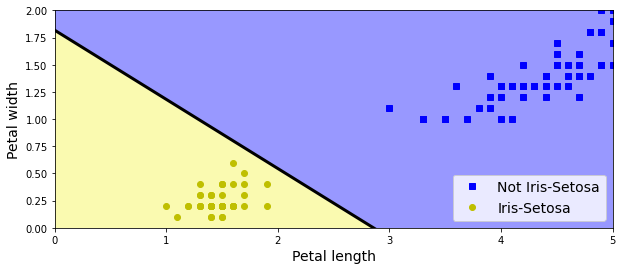

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

## 다층 퍼셉트론과 역전파 

다층 퍼셉트론은 입력층 하나와 은닉층이라 불리는 하나 이상의 TLU층과 마지막 출력층 으로 구성된다. 입력층과 가까운 층을 보통 하위 층이라 부르고 출력에 가까운 층을 상위 층이라고 부른다. 출력층을 제외하고 모든 층은 편향 뉴런을 포함하여 다음 층과 FC 연결된다.
 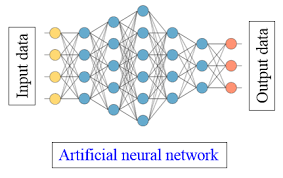 
 
 은닉층을 여러 개 쌓아 올린 인공 신경망을 DNN 심층 신경망이라고 한다. 
 
 ----
 
역전파 진행과정   
하나의 미니배치씩 진행하여 전체 훈련 세트를 처리한다. 이 과정을 여러번 반복하는데 각 반복을 에포크라고 한다. 각 미니배치는 네트워크의 입력츠응로 전달되어 첫 번째 은닉층으로 보내진다. 그 다음 해당 층에 있는 모든 뉴련의 출력을 계산한다. 이 결과는 다음 층으로 전달된다. 다시 이 층의 출력을 계산하고 결과는 다음 층으로 전달된다. 이런 식으로 마지막 층인 출력층의 출력을 계산할 때까지 게속된다. 이것이 정방향 Forward pass 이다.  

알고리즘이 네트워크의 출력 오차를 측정한다. 즉 손실함수를 사용하여 기대하는 출력과 네트워크의 실제 출력을 비교하고 오차 측정값을 반환한다. 이제 각 출력 연결이 이 오차에 기여하는 정도를 계산하나. chain rule를 적용하여 이 단게를 빠르고 정확하게 수행한다.  입력층에 도달할 때까지 역전파를 진행한다. 마지막으로 알고리즘은 경사 하강법을 수행하여 방금 계산한 오차 그이디언트를 사용해 네트워크에 있는 모든 연결 가중치를 수정한다.

-----

은닉층의 연결 가중치를 랜덤하게 초기화하는 것이 중요하다. 그렇지 않으면 훈련이 안될 것이다. 예를 들어 모든 가중치와 편향을 0으로 초기화하면 층의 모든 뉴런이 같아지게 된다. 따라서 역전파도 뉴런을 동일하게 바꾸어 모든 뉴런이 똑같아진 채로 남는다. 즉 층에 뉴런이 수백 개있더라도 모델은 마치 뉴런이 하나인 것처럼 작동할 것이다. 가중치를 랜덤하게 초기화하면 대칭성이 깨지므로 역전파가 전제 뉴런을 다앙하게 훈련할 수 있다.

## 활성화 함수

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

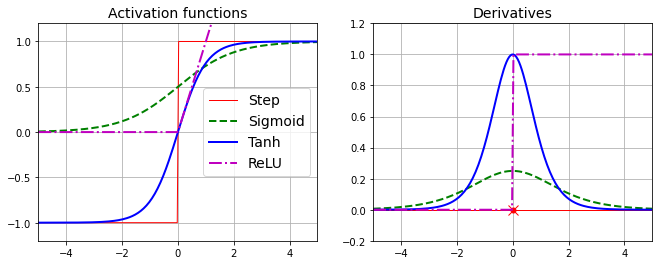

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

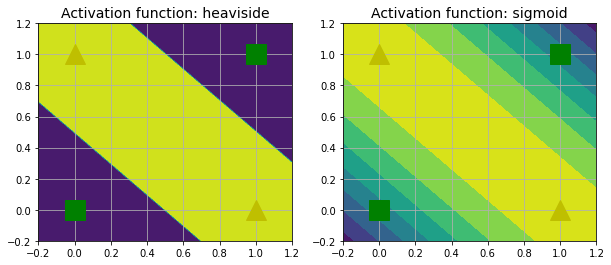

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### 회귀용 다층 퍼셉트론

일반적으로 회귀용 다충 퍼셉트론을 만들 때 출력 뉴런에 활성화 함수를 사용하지 않고 어떤 범위의 값도 출력되도록 한다. 하지만 출력이 항상 양수여야 한다면 출력층에 ReLU 활성화 함수를 사용할 수 있다. 또는 softplus 활성화 함수를 사용할 수 있다. 이 함수는 ReLU의 변형으로 log(1 + exp(z)) 이다. Z가 음수일 때 0에 가까워지고 Z가 큰 양수일 수록 Z에 가까워진다. 마지막으로 어떤 범위 안의 값을 예측하고 싶다면 로지스틱 함수나 하어피볼릭 탄젠트 함수를 사용하고 레이블의 스케일을 적절한 범위로 조정할 수 있다. 

### 분류용 다층 퍼셉트론 

출력층는 소프트 맥스, 손실함수는 크로스 엔트로피 

## 이미지 분류

In [10]:
import tensorflow as tf
from tensorflow import keras

In [15]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train) ,(X_test, y_test) =  mnist.load_data()

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

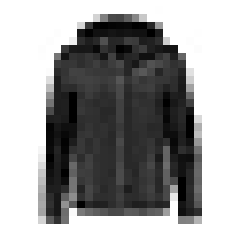

In [18]:
plt.imshow(X_train[0], cmap ='binary')
plt.axis('off')
plt.show()

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

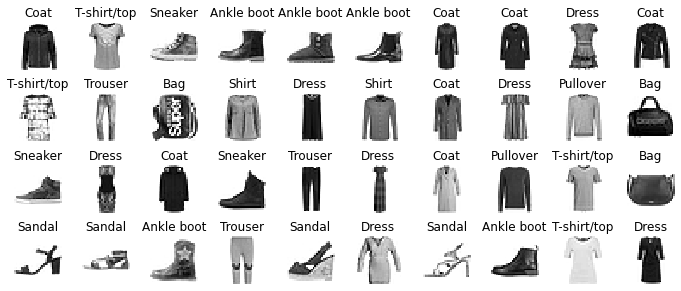

In [21]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [22]:
model = keras.models.Sequential()
# 샘플의 크기만 지정
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 784 X 300 + 300bias
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
# 층을 하나씩 추가하지 않고 Sequential 모델 지정 

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [28]:
weights, biases = hidden1.get_weights()

In [29]:
weights

array([[-0.03023075, -0.0575783 , -0.00954967, ...,  0.01707353,
        -0.05080394,  0.03039919],
       [-0.05594556, -0.0501955 ,  0.03902177, ...,  0.06310339,
         0.05823036,  0.02002426],
       [-0.03384427,  0.0638098 ,  0.03509748, ..., -0.02273932,
         0.04900513,  0.03330628],
       ...,
       [-0.00677692,  0.04447412,  0.03799324, ...,  0.03317993,
         0.01690114, -0.06676963],
       [ 0.02097186,  0.03880782,  0.03569867, ...,  0.01208708,
         0.00039962,  0.04468236],
       [ 0.0381    , -0.0641228 ,  0.07163946, ...,  0.04622258,
         0.01529388,  0.00439657]], dtype=float32)

In [31]:
# model compile을 통해 사용할 손실 함수와 옵티마이저를 지정
# 샘플마다 타깃 클래스 인덱스 하나씩 있을 때 sparse_categorical_crossentropy, 샘플 마다 클래스별 타깃 확률(원핫벡터)을 가지고 있다면 categorical crossentropy
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [32]:
# 특정 클래스가 많이 등장하고 다른 클래스는 조금 등장한다면 class_weight 매개변수를 지정, 적게 등장하는 클래스는 높은 가중치 부여, 많이 등장하는 클래스는 낮은 가중치 부여
# 샘플별로 가중치 부여하고 싶다면 sample_weight매개변수 지정
# class_weight, sample_weight 모두 지정하면 두 값을 곱해서 사용

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4807 - accuracy: 0.8261 - val_loss: 0.3592 - val_accuracy: 0.8720
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3624 - accuracy: 0.8678 - val_loss: 0.3812 - val_accuracy: 0.8654
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3277 - accuracy: 0.8788 - val_loss: 0.3215 - val_accuracy: 0.8826
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3032 - accuracy: 0.8876 - val_loss: 0.3092 - val_accuracy: 0.8868
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2847 - accuracy: 0.8937 - val_loss: 0.3108 - val_accuracy: 0.8898
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2699 - accuracy: 0.8998 - val_loss: 0.3146 - val_accuracy: 0.8878
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2594 - accuracy: 0.9030 - val_loss: 0.2972 - val_ac

In [33]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

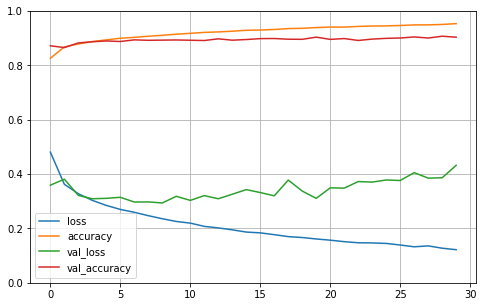

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4747 - accuracy: 0.8904


[0.4747254550457001, 0.8904000520706177]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

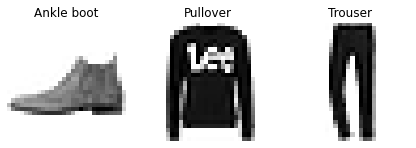

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## 서브 클래싱 API 

In [42]:
class WideDeepModel(keras.models.Model) :
    def __init__ (self, units =30 , activation = 'relu', **kwargs) :
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation= activation)
        self.hidden2= keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideDeepModel(30, activation="relu")

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

## 하이퍼 파라미터 튜닝 

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [48]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

In [ ]:
y_pred = keras_reg.predict(X_new)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model.evaluate(X_test, y_test)

* Hyperopt - 학습률과 같은 실수와 층의 개수 같은 이산적인 값을 포함하여 모든 종류의 복잡한 탐색 공간에 대해 최적화를 수행할 수 있는 라이브러리 
* Yperas, Kopt, Talos - 케라스 모델을 위한 하이퍼파라미터 최적화 라이브러리 
* 케라스 튜너 - 사용하기 쉬운 하이퍼파라미터 최적화 라이브러리
* Scikit-Optimize - 범용최적화 라이브러리
* Spearmint - 베이즈 최적화 라이브러리
* Hyperband - Hyperband 논문을 기반으로 구축된 빠른 하이퍼파라미터 튜닝 라이브러리 
* Sklearn-Deap - 진화 알고리즘기반의 하이퍼파라미터 최적화 라이브러리 

## 은닉층 개수 

은닉층 하나로 시작해도 많은 문제에서 납득할 만한 결과를 얻을 수 있다. 이론적으로 은닉층이 하나인 다층 퍼셉트론이더라도 뉴런 개수가 충분하면 아주 복잡한 함수도 모델링 할 수 있다. 하지만 복잡한 문제에서는 심층 신경망이 앝은 신경망보다 파라미터 효율성이 훨씬 좋다. 심층 신경망은 복잡한 함수를 모델링하는데 얕은 신경망보다 훨씬 적은 수의 뉴런을 사용하므로 동일한 양의 훈련 데이터에서 더 높은 성능을 낼 수 있다. 

----

계층 구조는 심층 신경망이 좋은 솔루션으로 빨리 수렴하게끔 도와줄 뿐만 아니라 새로운 데이터에 일반화 되는 능력도 향상 시켜준다. 예를 들어 사진에서 얼굴을 인식하는 모델을 훈련한 후 헤어스타일을 인식하는 신경망을 새로 훈련하려면 첫 번째 네트워크의 하위 층을 재사용하여 훈련을 시작할 수 있다. 새로운 신경망에서 처음 몇 개 층의 가중치와 편향을 난수로 초기화하는 대신 첫 번째 신경망의 층에 있는 가중치와 편향값으로 초기화할 수 있다. 이런 방식을 사용하면 대부분의 사진에 나타나는 저수준 구조를 학습할 필요가 없게 된다. 즉 고수준 구조만 학습하면 된다. 이를 전이 학습이라고 한다.

## 은닉층의 뉴런 수 

입력층과 출력층의 뉴런 개수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정된다.   
은닉층의 구성 방식은 일반적으로 각 층의 뉴런을 점점 줄여서 깔때기 처럼 구성된다. 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문이다. 대부분의 경우 모든 은닉층에 같은 크기를 사용해도 동일하거나 더 나은 성능을 낸다. 또한 튜닝할 하이퍼파라미터가 층마다 한개씩이 아니라 전체를 통틀어 한개가 된다. 데이터셋에 따라 다르지만 다른 은닉층 보다 첫번째 은닉층을 크게 하는 것이 도움이 된다. 

----

층의 개수와 마찬가지로 네트워크가 과대 적합이 시작되기 전까지 점진적으로 뉴런수를 늘릴 수 있다. 하지만 실전에서는 필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고, 그런 다음 과대적합되지 않도록 조기 종료나 규제 기겁을 사용하는 것이 간단하고 효과적이다. 

**일반적으로 층의 뉴런 수보다 층 수를 늘리는 쪽이 이득이 많다**

## 학습률, 배치 크기 그리고 다른 하이퍼파라미터

### 학습률
**학습률은 가장 중요한 하이퍼파라미터이다.** 일반적으로 최적의 학습률은 최대 학습률의 절반정도이다. 좋은 학습률을 찾는 한가지 방법은 매우 낮은 학습률에서 시작해서 점진적으로 매우 큰 학습률까지 수백번 반복하여 모델을 훈련하는 것이다. 반복마다 일정한 값을 학습률에 곱한다. 

-----

### 배치크기 
배치크기는 모델 성능과 훈련 시간에 큰 영향을 미칠 수 있다. 큰 배치 크기를 사용하는 것의 주요 장점은 GPU와 같은 하드웨어 가속기를 효율적으로 활용할 수 있다는 점이다. 따라서 훈련 알고리즘이 초당 더 많은 샘플을 처리할 수 있다. 주의할 점은 실전에서 큰 배치를 사용하면 특히 훈련 초기에 종종 불안정하게 훈련 된다. 배치크기 선택 전략은 학습률 예열을 사용해 큰 배치 크기를 시도해보고 만약 훈련이 불안정하거나 최종 성능이 만족스럽지 못하면 작은 배치 크기를 사용해 본다.